# Preprocessing & Sampling

## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

## Import Dataset

In [42]:
df = pd.read_csv("Data/travel_insurance.csv")

## Preprocessing Data

### Handling Missing Data

In [43]:
#Check the percentages of missing value
df.isnull().sum() / df.shape[0] * 100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

- Gender has 71% NaN Values

Approaches to handle Missing Values:
1. Deleting the columns with missing data
2. Deleting the rows with missing data
3. Filling the missing data with a value – Imputation
4. Imputation with an additional column
5. Filling with a Regression Model

In this case, we can either 
1. Delete column 'Gender'
or
2. Create three categories: M,F,Unknown

In [44]:
# Imputing with 'U' unspecified gender
df['Gender'] = df['Gender'].fillna('U')

### Encoding

In [45]:
df1_saved = df.copy()

In [46]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [47]:
#Label Encoding

from sklearn import preprocessing

label_encoder2 = preprocessing.LabelEncoder()
df.loc[:,'Agency Type']= label_encoder2.fit_transform(df.loc[:, 'Agency Type'])

label_encoder3 = preprocessing.LabelEncoder()
df.loc[:,'Distribution Channel']= label_encoder3.fit_transform(df.loc[:, 'Distribution Channel'])

label_encoder5 = preprocessing.LabelEncoder()
df.loc[:,'Claim']= label_encoder5.fit_transform(df.loc[:,'Claim'])

label_encoder10 = preprocessing.LabelEncoder()
df.loc[:,'Gender']= label_encoder10.fit_transform(df.loc[:, 'Gender'])

<AxesSubplot:>

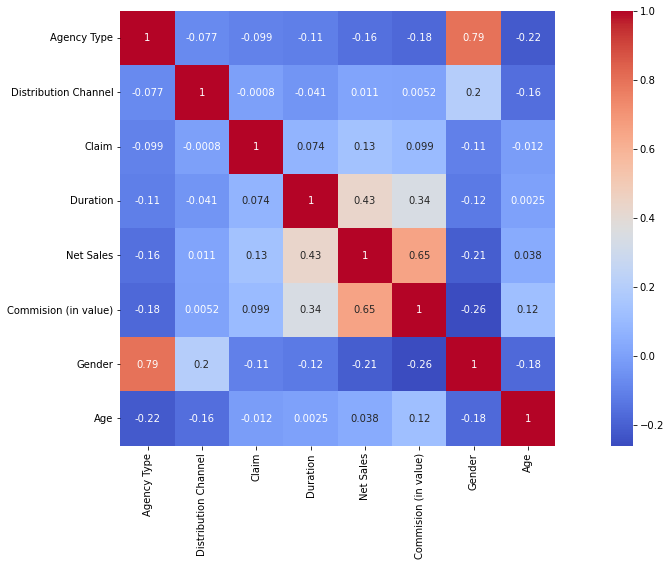

In [48]:
#Correlation Matrix

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

In [49]:
#Shifting the target column
first_column = df.pop('Claim')

df.insert(0, 'Claim', first_column)

In [50]:
#One Hot Encoding

df = pd.get_dummies(df, columns=['Agency','Product Name','Destination'], drop_first=True)

### Splitting the dataset into Training set and Test set

In [51]:
X=df.iloc[:,1:]                                              #-1 means index of last column
y=df.iloc[:,0]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)  #75-25 split with fixed seed

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train.loc[:,:] = sc.fit_transform(X_train.loc[:,:])
X_test.loc[:,:] = sc.transform(X_test.loc[:,:])